In [1]:
import timeit
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import glob
import time
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"] = (3,3)
import os
import sys
import numba
from scipy.optimize import curve_fit
import scipy.integrate as si
from scipy.integrate import quad

print(time.ctime())

Thu Sep 15 13:55:22 2022


In [2]:
pairs_13 = np.load('pairs1_3.npy')


In [3]:
def gauss(x, A, t0, sigma, d):
    y = abs(A)*np.exp(-(x-t0)**2/(2.*abs(sigma)**2)) + d
    return y

In [4]:
def v_err(A,D,sigma_A,sigma_D):
    return (A/D)*np.sqrt((sigma_A/A)**2 + (sigma_D/D)**2)

In [5]:
nbins = 500

In [6]:
h13_total=np.histogram(pairs_13[:][:,1],bins=nbins)

In [7]:
x = np.linspace(-20,20,nbins+1)

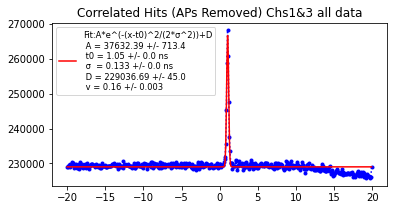

In [8]:
fig, ax = plt.subplots(figsize = (6,3))
ax.set_title('Correlated Hits (APs Removed) Chs1&3 all data')
best_vals, covar = curve_fit(gauss, x[:-1], h13_total[0], p0 = [10000, 1, 1, 58000])
#ax.hist(pairs_13[:][:,1],bins=600,histtype='step')
ax.plot(x[:-1], h13_total[0], 'b.:')
ax.plot(x[:-1], gauss(x[:-1], *best_vals),'r-',label='Fit:A*e^(-(x-t0)^2/(2*\u03C3^2))+D\n A = %.2f +/- %.1f\n t0 = %.2f +/- %.1f ns\n \u03C3  = %.3f +/- %.1f ns\n D = %.2f +/- %.1f\n v = %.2f +/- %.3f' %(abs(best_vals[0]),np.sqrt(np.diag(covar)[0]),(best_vals[1]), np.sqrt(np.diag(covar)[1]), abs(best_vals[2]), np.sqrt(np.diag(covar)[2]), (best_vals[3]), np.sqrt(np.diag(covar)[3]), (best_vals[0]/best_vals[3]), v_err(best_vals[0],best_vals[3],np.sqrt(np.diag(covar)[0]),np.sqrt(np.diag(covar)[3]))))
ax.legend(fontsize = 'small',loc='best')
#ax.set_xlim(-5000,5000)
#ax.set_ylim(40000,60000)
globals()["t0_13"] = ((best_vals[1]))
globals()["sigma_13"] = abs((best_vals[2]))
globals()["v_13"] = abs(best_vals[0]/best_vals[3])
plt.savefig('ch13_peak.png')

(array([191909., 192073., 188668., 191981., 192469., 189840., 191824.,
        191966., 190004., 191923., 192829., 189679., 192509., 192279.,
        188667., 192146., 191645., 189940., 191888., 191620., 189460.,
        191900., 191450., 189631., 191574., 192300., 189521., 192206.,
        191665., 189012., 192665., 191839., 188839., 192390., 192121.,
        189716., 192022., 191613., 188370., 192162., 192658., 189401.,
        191393., 192041., 189091., 191906., 192212., 189716., 192495.,
        192401., 189616., 191758., 192302., 189576., 192060., 191663.,
        189565., 192091., 191927., 189826., 192106., 191583., 189429.,
        192174., 191732., 188751., 191342., 191611., 189703., 192801.,
        192020., 189198., 191913., 191777., 189305., 192112., 192260.,
        188879., 191835., 191947., 188959., 192089., 191853., 189360.,
        192201., 192015., 188951., 192165., 192681., 189306., 192387.,
        192728., 189466., 192638., 192301., 189016., 191955., 192258.,
      

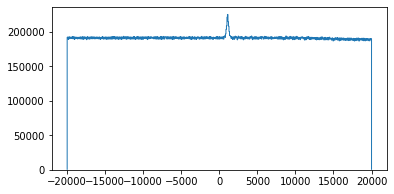

In [9]:
fig, ax = plt.subplots(figsize = (6,3))
ax.hist(pairs_13[:,1],bins=600,histtype='step')

In [10]:
t0=globals()["t0_13"]
sigma=globals()["sigma_13"]


pair_13_window=np.logical_and(pairs_13[:,1]>t0*1000-sigma*0.75*1000,pairs_13[:,1]<t0*1000+sigma*0.75*1000,)

isolated_pairs_13=pairs_13[pair_13_window]

In [11]:
triplets_123_idler = np.load('idler_pairs123.npy')
triplets_134_idler = np.load('idler_pairs134.npy')
triplets_124_idler = np.load('idler_pairs124.npy')

triplets_123_signal = np.load('signal_pairs123.npy')
triplets_134_signal = np.load('signal_pairs134.npy')
triplets_124_signal = np.load('signal_pairs124.npy')


In [12]:
triplets_123_idler_dt12=np.subtract(triplets_123_idler[:,1],triplets_123_idler[:,0])
triplets_123_idler_dt13=np.subtract(triplets_123_idler[:,2],triplets_123_idler[:,0])
triplets_123_idler_dt23=np.subtract(triplets_123_idler[:,2],triplets_123_idler[:,1])


triplets_134_idler_dt13=np.subtract(triplets_134_idler[:,1],triplets_134_idler[:,0])
triplets_134_idler_dt14=np.subtract(triplets_134_idler[:,2],triplets_134_idler[:,0])
triplets_134_idler_dt34=np.subtract(triplets_134_idler[:,2],triplets_134_idler[:,1])


triplets_123_signal_dt12=np.subtract(triplets_123_signal[:,1],triplets_123_signal[:,0])
triplets_123_signal_dt13=np.subtract(triplets_123_signal[:,2],triplets_123_signal[:,0])
triplets_123_signal_dt23=np.subtract(triplets_123_signal[:,2],triplets_123_signal[:,1])

triplets_134_signal_dt13=np.subtract(triplets_134_signal[:,1],triplets_134_signal[:,0])
triplets_134_signal_dt14=np.subtract(triplets_134_signal[:,2],triplets_134_signal[:,0])
triplets_134_signal_dt34=np.subtract(triplets_134_signal[:,2],triplets_134_signal[:,1])

triplets_124_idler_dt12=np.subtract(triplets_124_idler[:,1],triplets_124_idler[:,0])
triplets_124_idler_dt14=np.subtract(triplets_124_idler[:,2],triplets_124_idler[:,0])
triplets_124_idler_dt24=np.subtract(triplets_124_idler[:,2],triplets_124_idler[:,1])



triplets_124_signal_dt12=np.subtract(triplets_124_signal[:,1],triplets_124_signal[:,0])
triplets_124_signal_dt14=np.subtract(triplets_124_signal[:,2],triplets_124_signal[:,0])
triplets_124_signal_dt24=np.subtract(triplets_124_signal[:,2],triplets_124_signal[:,1])


(-2500.0, 4500.0)

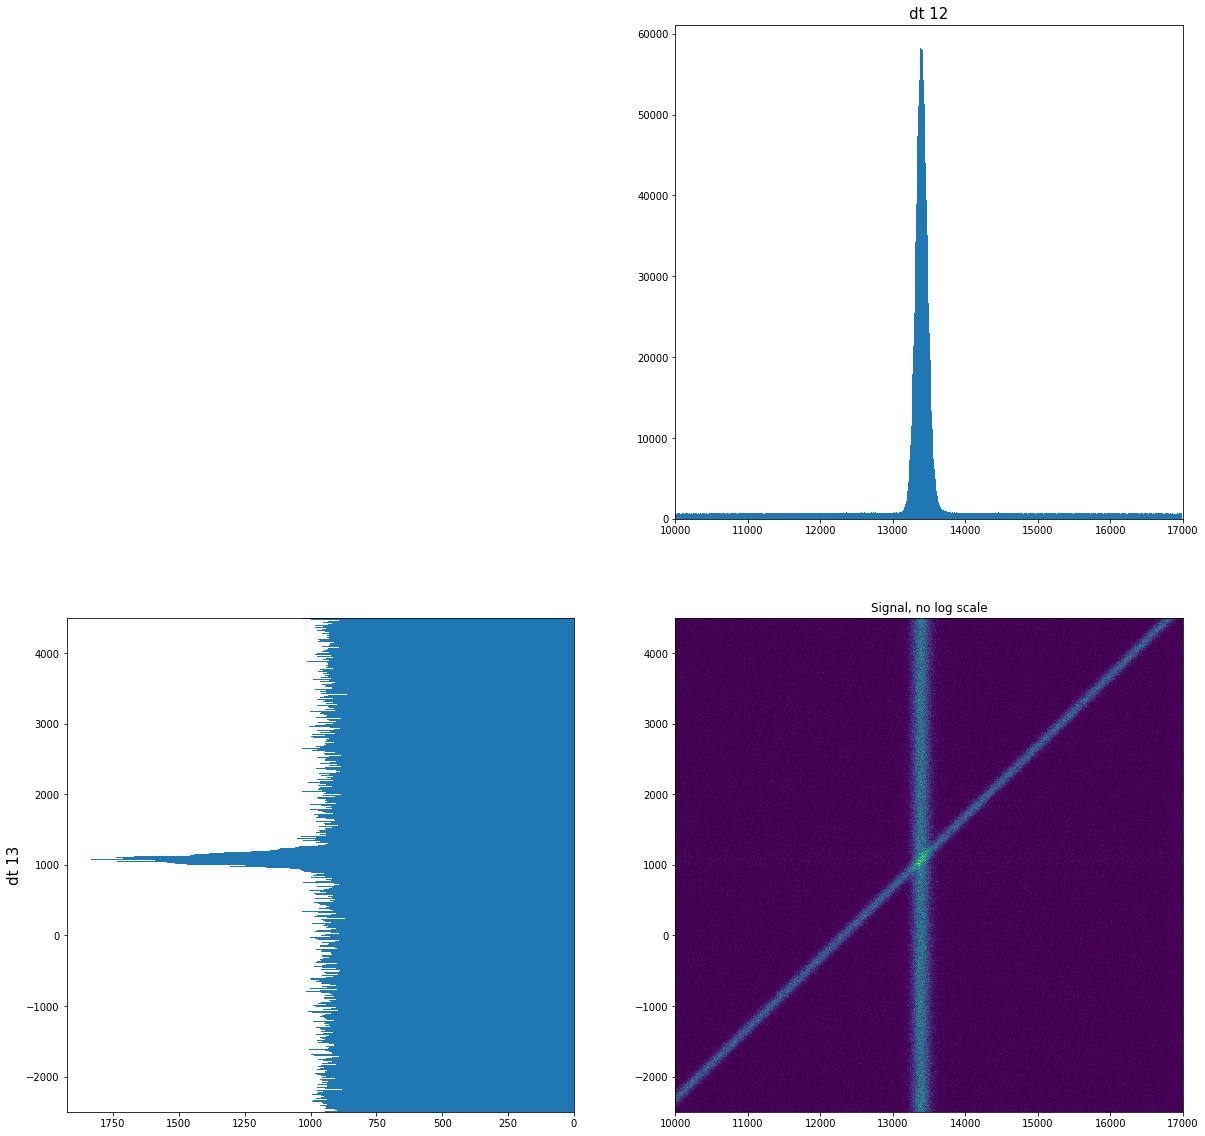

In [13]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))
fig.delaxes(ax[0,0])

ax[1,1].hist2d(triplets_123_signal_dt12,triplets_123_signal_dt13,bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(10000,17000)
ax[1,1].set_ylim(-2500,4500)


_=ax[0,1].hist(triplets_123_signal_dt12,bins=range(10000,17000,10),range=(10000,17000,10))
ax[0,1].set_xlim([10000,17000])
ax[0,1].set_title("dt 12",fontsize=15)


_=ax[1,0].hist(triplets_123_signal_dt13,bins=range(-2500,4500,10),range=(-2500,4500,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 13",fontsize=15)

ax[1,1].set_title("Signal, no log scale")
ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-2500,4500])

#ax2 = ax[1,0].twinx()
#ax2.set_ylim(ax.get_ylim())
#ax2.set_yticks(y_pos)
#ax2.set_yticklabels(people)

(-5000.0, 5000.0)

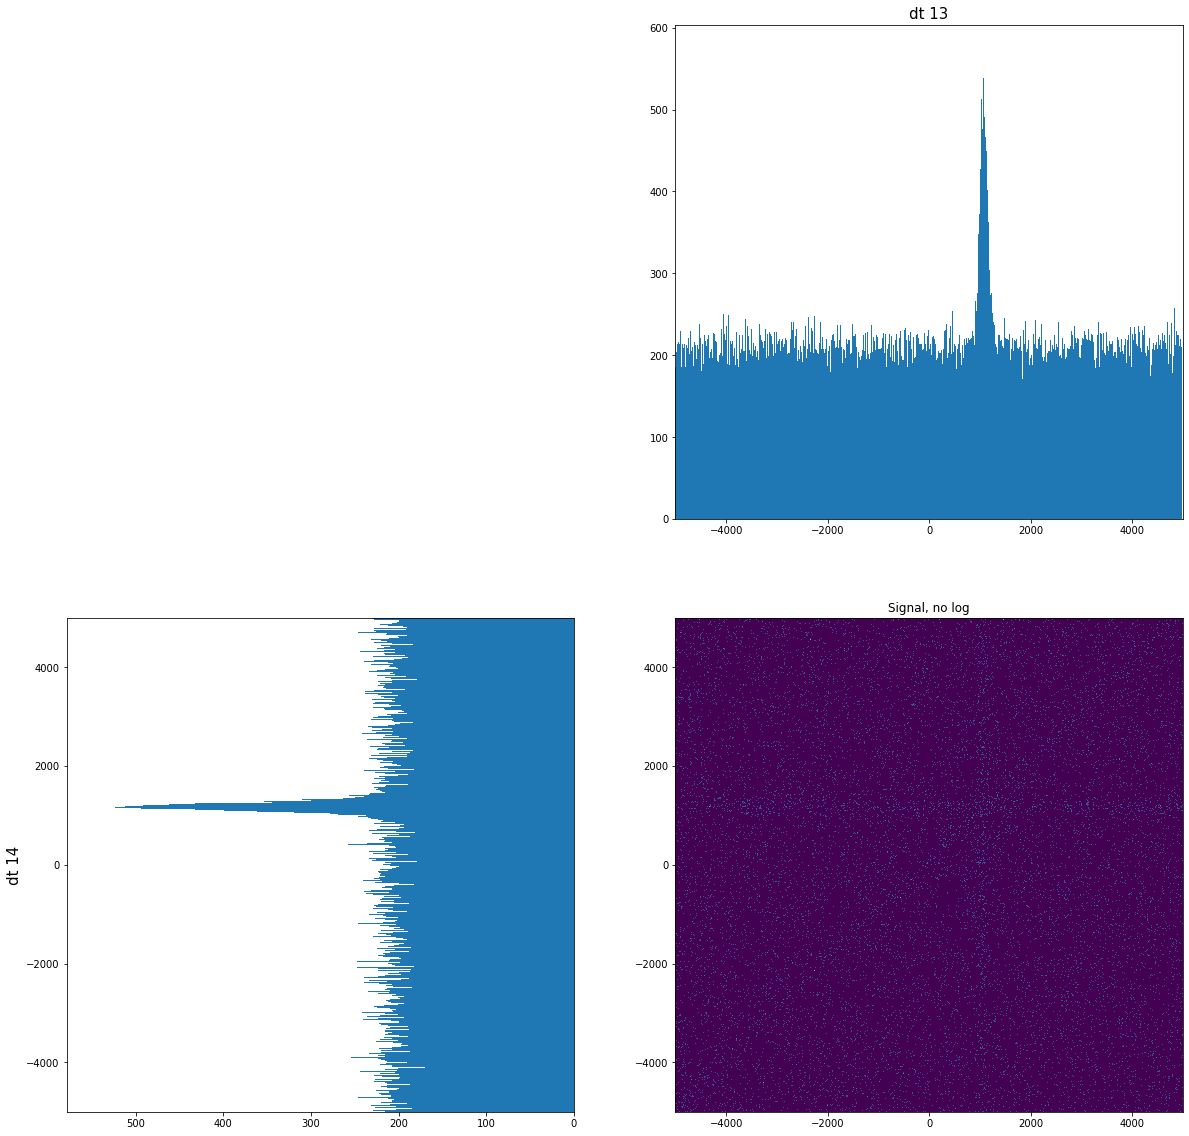

In [14]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))
fig.delaxes(ax[0,0])

ax[1,1].hist2d(triplets_134_signal_dt13,triplets_134_signal_dt14,bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(-5000,5000)
ax[1,1].set_ylim(-5000,5000)


_=ax[0,1].hist(triplets_134_signal_dt13,bins=range(-5000,5000,10),range=(-5000,5000,10))
ax[0,1].set_xlim([-5000,5000])
ax[0,1].set_title("dt 13",fontsize=15)


_=ax[1,0].hist(triplets_134_signal_dt14,bins=range(-5000,5000,10),range=(-5000,5000,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 14",fontsize=15)


ax[1,1].set_title("Signal, no log")

ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-5000,5000])

#ax2 = ax[1,0].twinx()
#ax2.set_ylim(ax.get_ylim())
#ax2.set_yticks(y_pos)
#ax2.set_yticklabels(people)

(-2500.0, 4500.0)

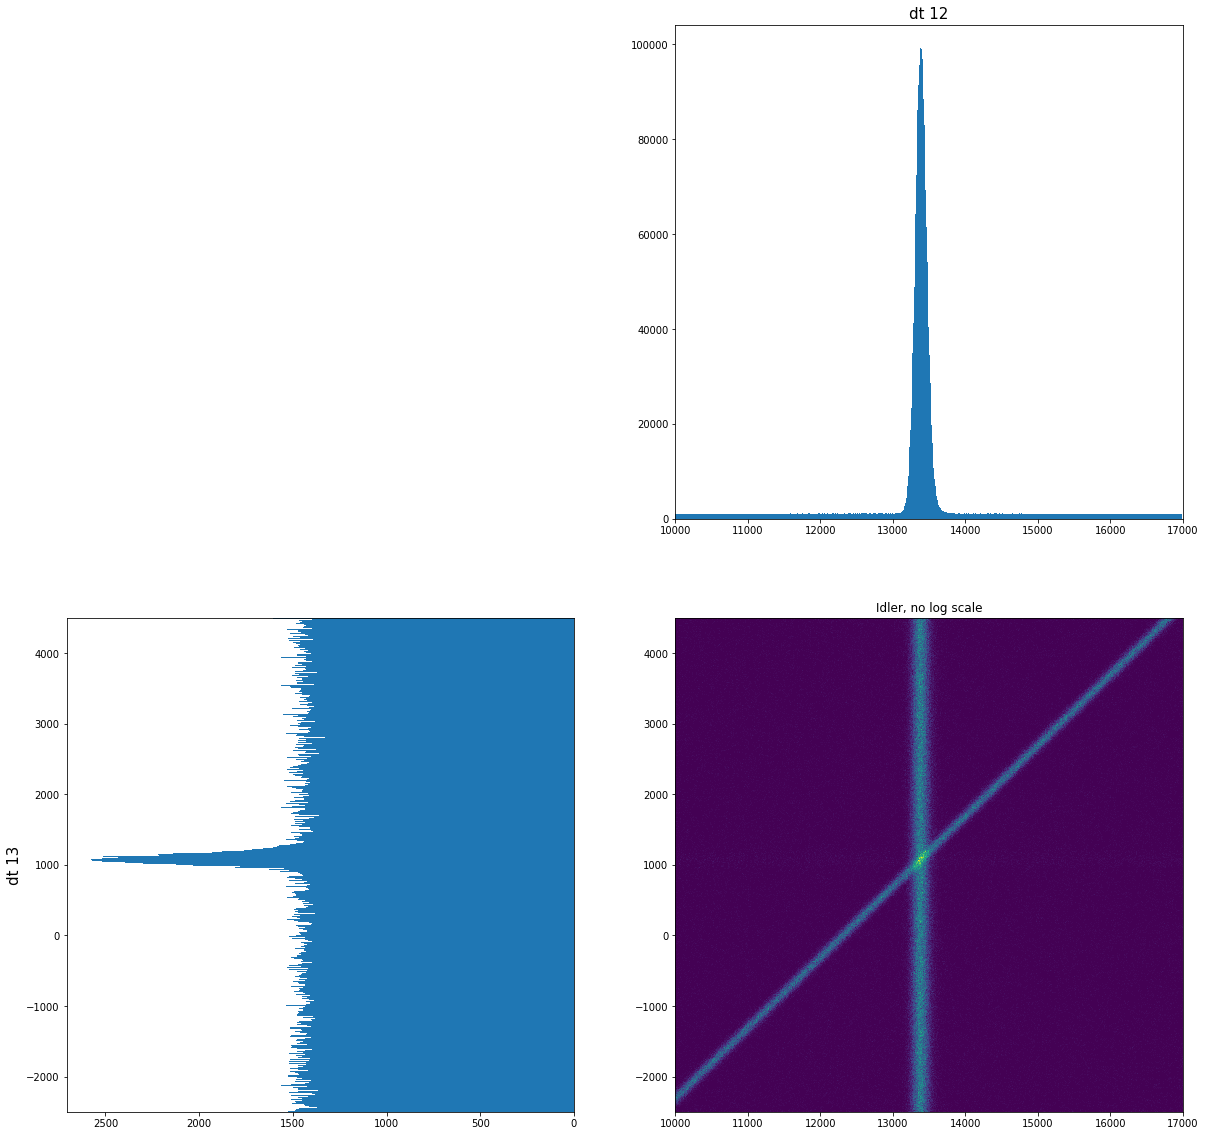

In [15]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))
fig.delaxes(ax[0,0])

ax[1,1].hist2d(triplets_123_idler_dt12,triplets_123_idler_dt13,bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(10000,17000)
ax[1,1].set_ylim(-2500,4500)


_=ax[0,1].hist(triplets_123_idler_dt12,bins=range(10000,17000,10),range=(10000,17000,10))
ax[0,1].set_xlim([10000,17000])
ax[0,1].set_title("dt 12",fontsize=15)


_=ax[1,0].hist(triplets_123_idler_dt13,bins=range(-2500,4500,10),range=(-2500,4500,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 13",fontsize=15)

ax[1,1].set_title("Idler, no log scale")
ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-2500,4500])

#ax2 = ax[1,0].twinx()
#ax2.set_ylim(ax.get_ylim())
#ax2.set_yticks(y_pos)
#ax2.set_yticklabels(people)

(-5000.0, 5000.0)

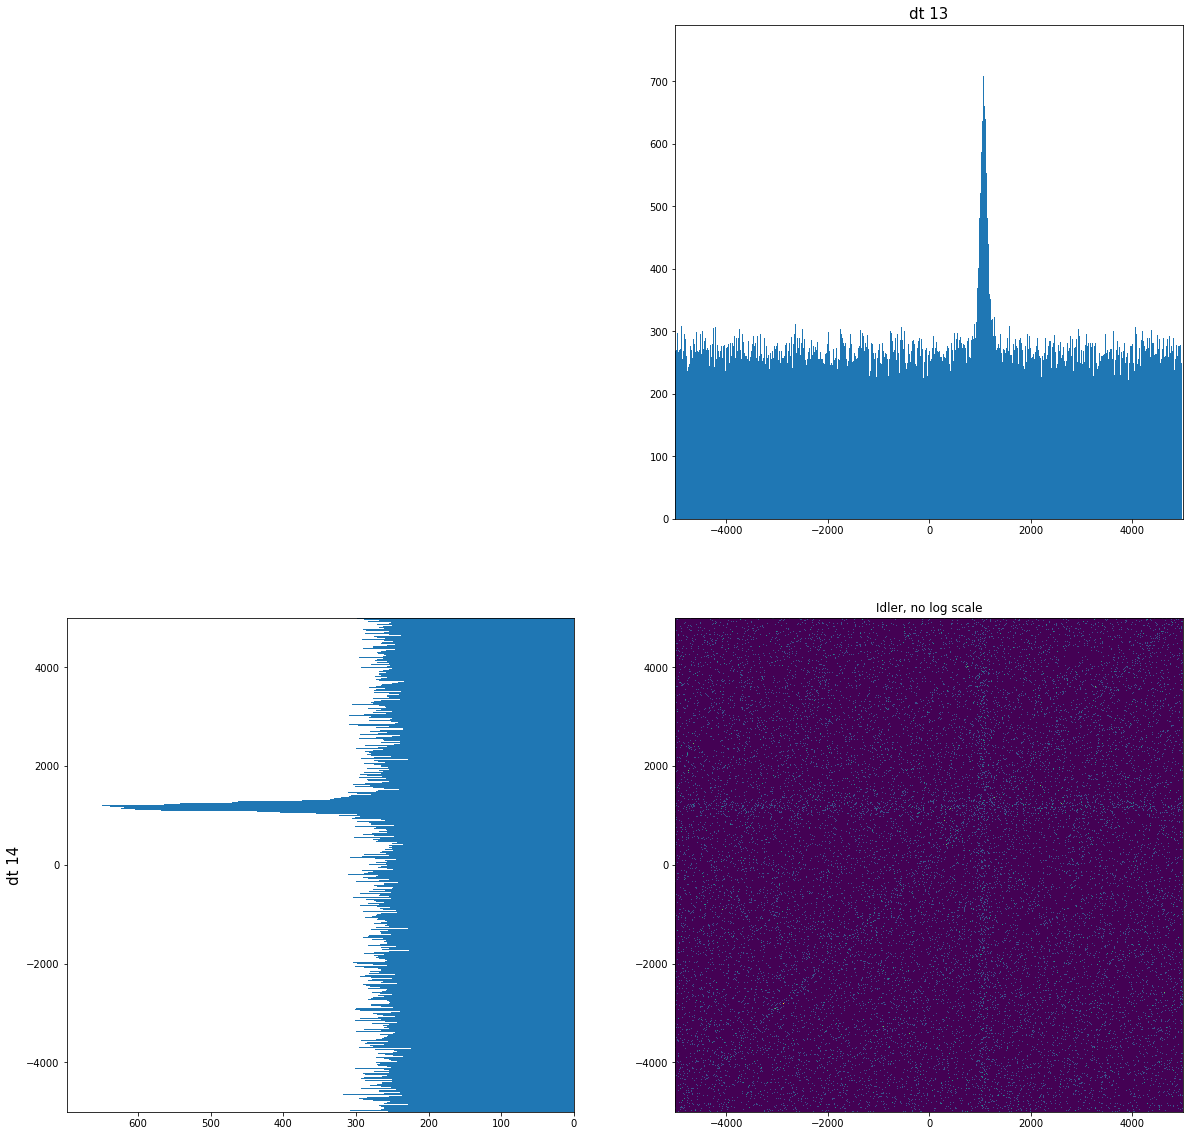

In [16]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))
fig.delaxes(ax[0,0])

ax[1,1].hist2d(triplets_134_idler_dt13,triplets_134_idler_dt14,bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(-5000,5000)
ax[1,1].set_ylim(-5000,5000)


_=ax[0,1].hist(triplets_134_idler_dt13,bins=range(-5000,5000,10),range=(-5000,5000,10))
ax[0,1].set_xlim([-5000,5000])
ax[0,1].set_title("dt 13",fontsize=15)


_=ax[1,0].hist(triplets_134_idler_dt14,bins=range(-5000,5000,10),range=(-5000,5000,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 14",fontsize=15)


ax[1,1].set_title("Idler, no log scale")

ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-5000,5000])

#ax2 = ax[1,0].twinx()
#ax2.set_ylim(ax.get_ylim())
#ax2.set_yticks(y_pos)
#ax2.set_yticklabels(people)

(-5000.0, 5000.0)

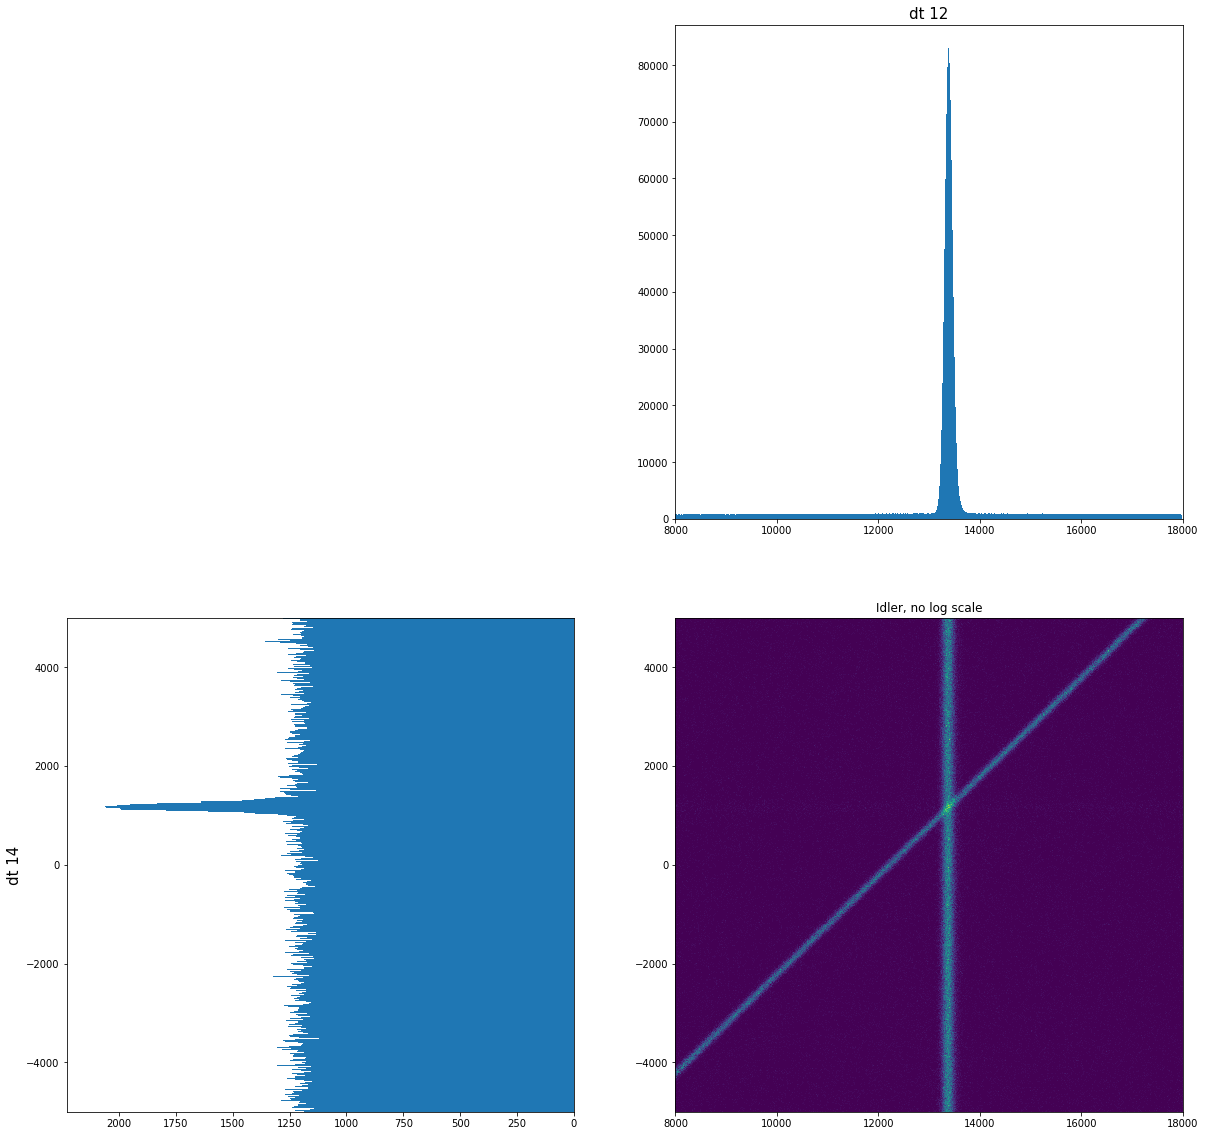

In [17]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize = (20,20))
fig.delaxes(ax[0,0])

ax[1,1].hist2d(triplets_124_idler_dt12,triplets_124_idler_dt14,bins=(np.arange(-20000, 20000, 10),np.arange(-20000, 20000, 10)))
ax[1,1].set_xlim(8000,18000)
ax[1,1].set_ylim(-5000,5000)


_=ax[0,1].hist(triplets_124_idler_dt12,bins=range(8000,18000,10),range=(8000,18000,10))
ax[0,1].set_xlim([8000,18000])
ax[0,1].set_title("dt 12",fontsize=15)


_=ax[1,0].hist(triplets_124_idler_dt14,bins=range(-5000,5000,10),range=(-5000,5000,10), orientation=u'horizontal')
ax[1,0].set_ylabel("dt 14",fontsize=15)


ax[1,1].set_title("Idler, no log scale")

ax[1,0].invert_xaxis()  # labels read top-to-bottom
ax[1,0].set_ylim([-5000,5000])

In [18]:
## 123

#signal

dt12_window_signal=np.logical_and(triplets_123_signal_dt12>13350- 83*0.75,triplets_123_signal_dt12<13350 + 83*0.75)
dt13_window_signal=np.logical_and(triplets_123_signal_dt13>950,triplets_123_signal_dt13<1100)


peaks_123_isolated_signal=np.logical_and(dt12_window_signal,dt13_window_signal)





#idler

dt12_window_idler=np.logical_and(triplets_123_idler_dt12>13350- 83*0.75,triplets_123_idler_dt12<13350+ 83*0.75)
dt13_window_idler=np.logical_and(triplets_123_idler_dt13>950,triplets_123_idler_dt13<1100)


peaks_123_isolated_idler=np.logical_and(dt12_window_idler,dt13_window_idler)


#134



#signal

dt13_window_signal=np.logical_and(triplets_134_signal_dt13>1000,triplets_134_signal_dt13<1150)
dt14_window_signal=np.logical_and(triplets_134_signal_dt14>1130-83*0.75,triplets_134_signal_dt14<1130+83*0.75)


peaks_134_isolated_signal=np.logical_and(dt13_window_signal,dt14_window_signal)


#idler

dt13_window_idler=np.logical_and(triplets_134_idler_dt13>1000,triplets_134_idler_dt13<1150)
dt14_window_idler=np.logical_and(triplets_134_idler_dt14>1130-83*0.75,triplets_134_idler_dt14<1130+83*0.75)


peaks_134_isolated_idler=np.logical_and(dt13_window_idler,dt14_window_idler)





#124

#signal

dt12_window_signal=np.logical_and(triplets_124_signal_dt12>13350- 83*0.75,triplets_124_signal_dt12<13350+83*0.75)
dt14_window_signal=np.logical_and(triplets_124_signal_dt14>1130-83*0.75,triplets_124_signal_dt14<1130+83*0.75)


peaks_124_isolated_signal=np.logical_and(dt12_window_signal,dt14_window_signal)





#idler

dt12_window_idler=np.logical_and(triplets_124_idler_dt12>13350- 83*0.75,triplets_124_idler_dt12<13350 + 83*0.75)
dt14_window_idler=np.logical_and(triplets_124_idler_dt14>1130-83*0.75,triplets_124_idler_dt14<1130+83*0.75)


peaks_124_isolated_idler=np.logical_and(dt12_window_idler,dt14_window_idler)


isolated_triplets_123_idler=triplets_123_idler[peaks_123_isolated_idler]
isolated_triplets_123_signal=triplets_123_signal[peaks_123_isolated_signal]
isolated_triplets_134_idler=triplets_134_idler[peaks_134_isolated_idler]
isolated_triplets_134_signal=triplets_134_signal[peaks_134_isolated_signal]
isolated_triplets_124_idler=triplets_124_idler[peaks_124_isolated_idler]
isolated_triplets_124_signal=triplets_124_signal[peaks_124_isolated_signal]





In [19]:
offset=isolated_triplets_123_signal[0,0]-isolated_pairs_13[0,0]

Text(0, 0.5, 'Entries')

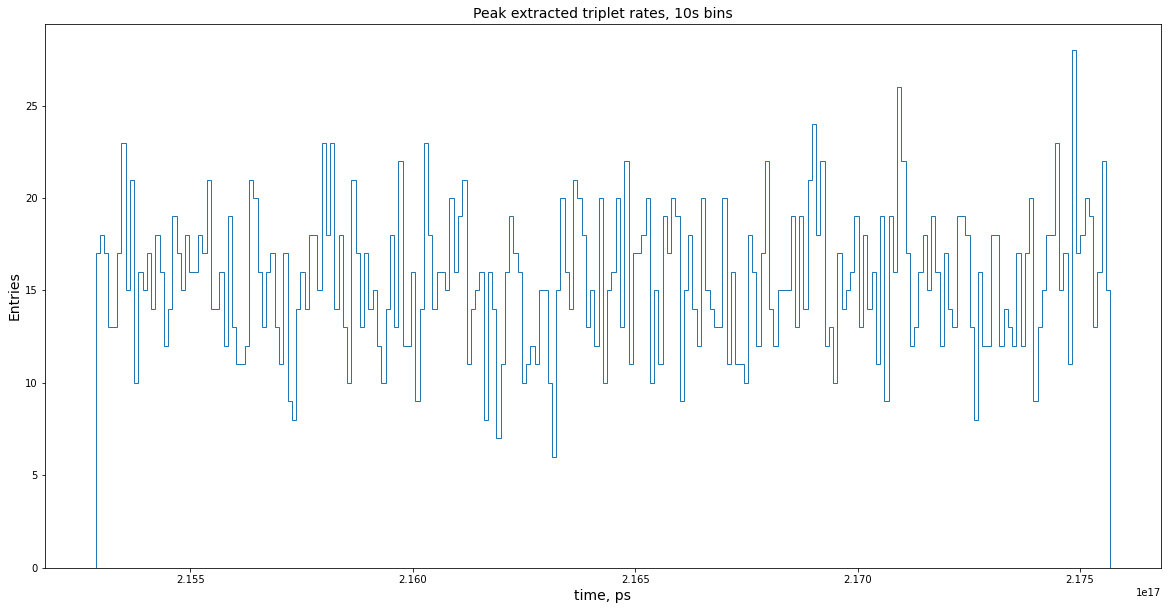

In [20]:
fig, ax = plt.subplots(figsize = (20,10))
_=ax.hist(isolated_triplets_123_signal[:,0]-offset,bins=238,histtype='step')
ax.set_title("Peak extracted triplet rates, 10s bins",fontsize=14)
ax.set_xlabel("time, ps",fontsize=14)
ax.set_ylabel("Entries",fontsize=14)

Text(0, 0.5, 'Entries')

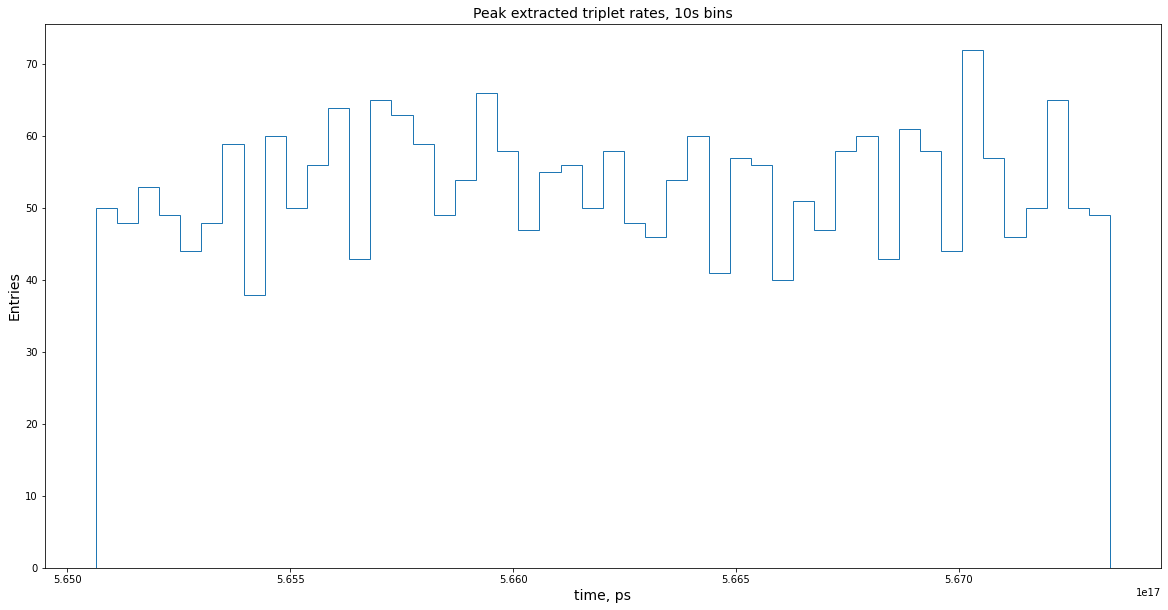

In [21]:
fig, ax = plt.subplots(figsize = (20,10))
_=ax.hist(isolated_triplets_124_signal[:,0],bins=48,histtype='step')
ax.set_title("Peak extracted triplet rates, 10s bins",fontsize=14)
ax.set_xlabel("time, ps",fontsize=14)
ax.set_ylabel("Entries",fontsize=14)

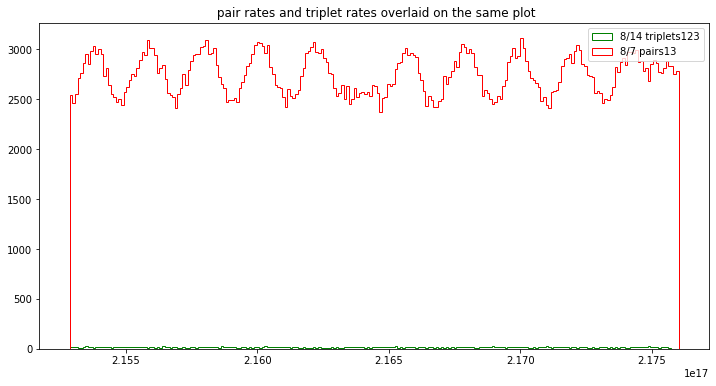

In [22]:

fig, ax = plt.subplots(figsize = (12,6))
h13 = ax.hist([isolated_pairs_13[:,0],isolated_triplets_123_signal[:,0]-offset], bins = 238, histtype = 'step', color = ['red','green'], label = ['8/7 pairs13','8/14 triplets123']);
plt.title(" pair rates and triplet rates overlaid on the same plot")
plt.legend()

In [23]:
offset=-(isolated_triplets_123_signal[0,0]-isolated_triplets_123_idler[0,0])
print (offset)

2776760125531693


(3500.0, 5000.0)

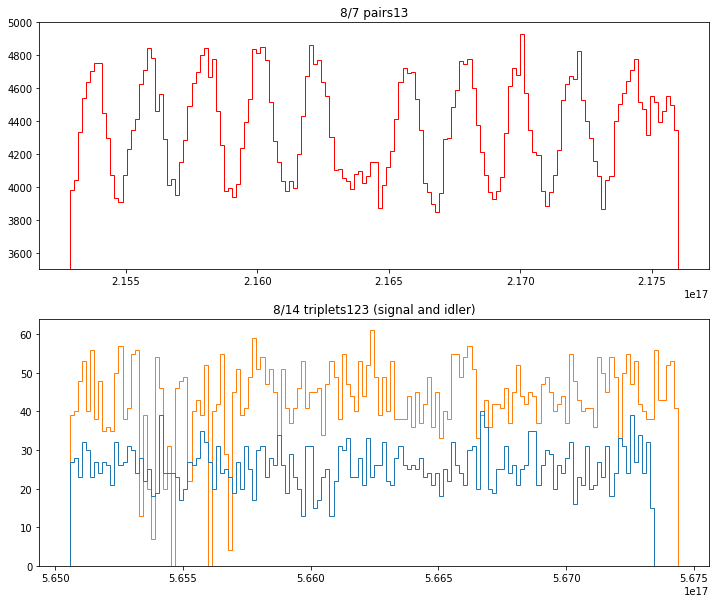

In [24]:
fig, ax = plt.subplots(nrows=2,figsize = (12,10))
_=ax[0].hist(isolated_pairs_13[:,0], bins = 150, histtype = 'step', color = 'red', label = '13 pairs 8/7',);
_=ax[1].hist([isolated_triplets_123_signal[:,0],isolated_triplets_123_idler[:,0]-offset],bins=150,histtype='step')
ax[0].set_title("8/7 pairs13")
ax[1].set_title("8/14 triplets123 (signal and idler)")

ax[0].set_ylim([3500,5000])

In [25]:
offset=isolated_triplets_123_signal[0,0]-isolated_pairs_13[0,0]

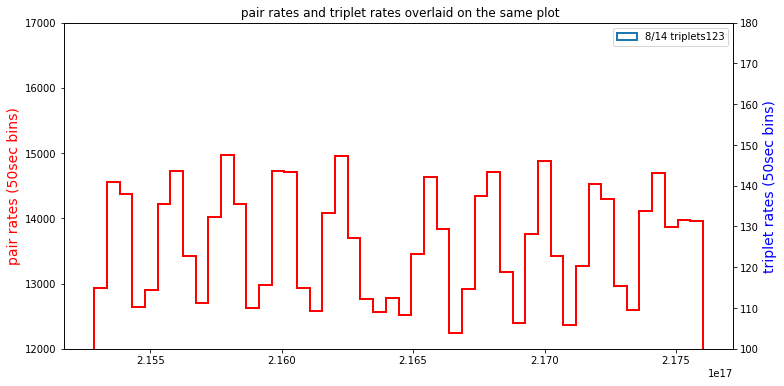

In [26]:

fig, ax = plt.subplots(figsize = (12,6))
h13 = ax.hist(isolated_pairs_13[:,0], bins = 48, histtype = 'step', color = 'red', label = ['8/7 pairs13'],linewidth=2);

ax2=ax.twinx()

ax.set_ylim([12000,17000])
ax2.set_ylim([100,180])
ax2.hist(isolated_triplets_123_signal[:,0]-offset, bins = 48, histtype = 'step',label='8/14 triplets123',linewidth=2)
ax.set_ylabel("pair rates (50sec bins)",color="red",fontsize=14)
ax2.set_ylabel("triplet rates (50sec bins)",color="blue",fontsize=14)
plt.title(" pair rates and triplet rates overlaid on the same plot")
plt.legend()